<a href="https://colab.research.google.com/github/GuruPrasad203/GuruPrasad203/blob/main/Data_Visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For better chart display in Colab
plt.style.use('ggplot')
sns.set_theme(style='whitegrid')
%matplotlib inline

In [22]:
# -----------------------------
# 2. Load Datasets
# -----------------------------
matches = pd.read_csv('/content/matches.csv')
# Note: Using engine='python' due to potential parsing issues in deliveries.csv
# It's recommended to clean the deliveries.csv file manually for best results.
deliveries = pd.read_csv('/content/deliveries.csv', engine='python', on_bad_lines='skip')


print("✅ Data Loaded Successfully!")
print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

✅ Data Loaded Successfully!
Matches shape: (1095, 20)
Deliveries shape: (240508, 17)


In [23]:
# -----------------------------
# 3. Basic Data Overview
# -----------------------------
print("\n--- Matches Info ---")
print(matches.info())
print("\n--- Deliveries Info ---")
print(deliveries.info())

print("\nMissing Values in Matches:\n", matches.isnull().sum().head())
print("\nMissing Values in Deliveries:\n", deliveries.isnull().sum().head())


--- Matches Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   objec

## Matplotlib Visualizations

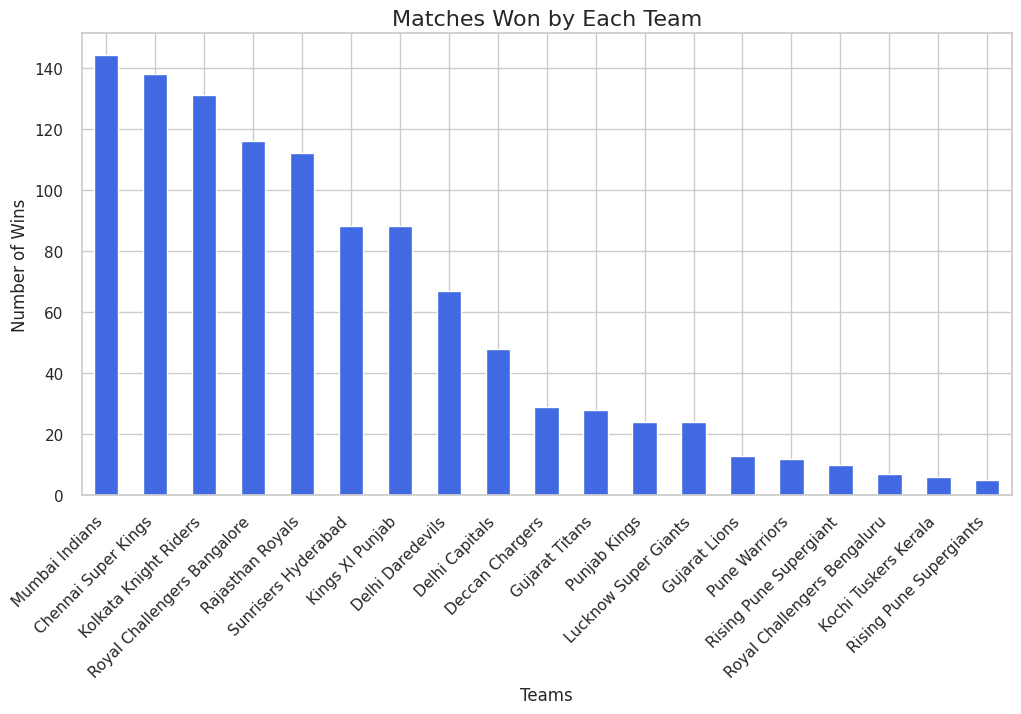

In [24]:
# (a) Bar Chart – Matches Won by Each Team
plt.figure(figsize=(12,6))
matches['winner'].value_counts().plot(kind='bar', color='royalblue')
plt.title('Matches Won by Each Team', fontsize=16)
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.show()

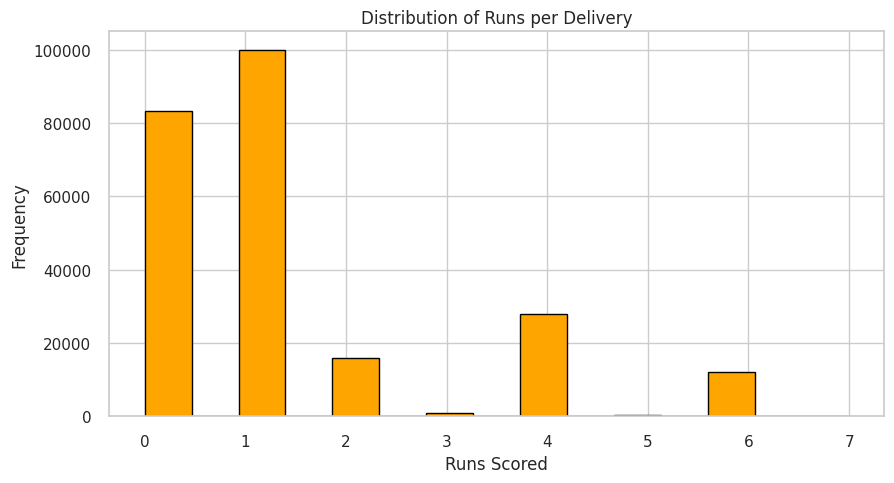

In [25]:
# (b) Histogram – Runs Distribution per Delivery
plt.figure(figsize=(10,5))
plt.hist(deliveries['total_runs'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Runs per Delivery')
plt.xlabel('Runs Scored')
plt.ylabel('Frequency')
plt.show()

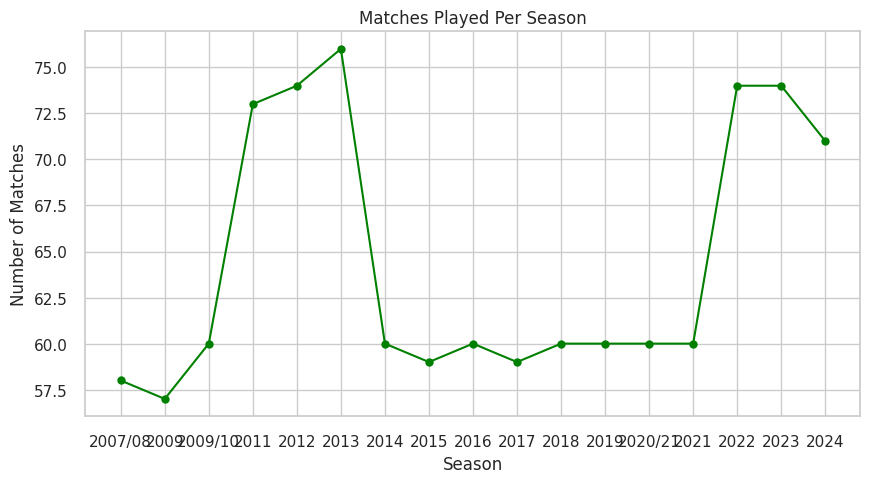

In [26]:
# (c) Line Chart – Matches Played Per Season
matches_per_season = matches.groupby('season').count()['id']
plt.figure(figsize=(10,5))
plt.plot(matches_per_season.index, matches_per_season.values, marker='o', color='green')
plt.title('Matches Played Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

## Seaborn Visualizations

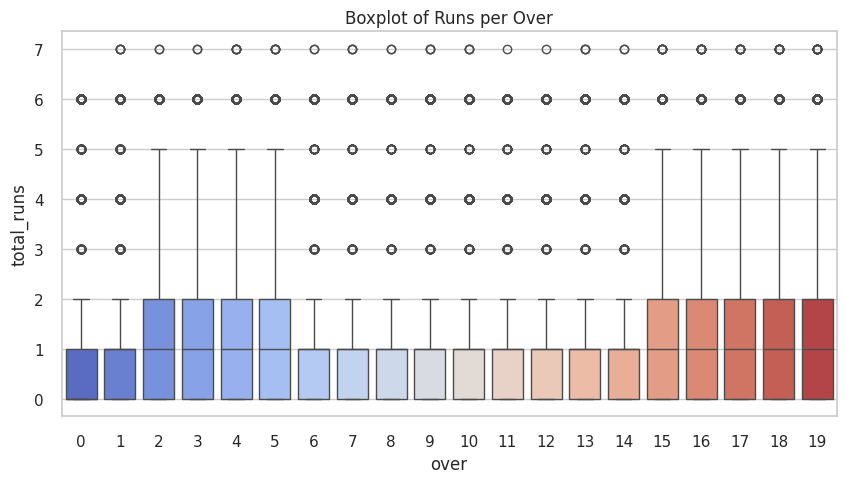

In [27]:
# (a) Boxplot – Runs per Over
plt.figure(figsize=(10,5))
sns.boxplot(x='over', y='total_runs', data=deliveries, palette='coolwarm')
plt.title('Boxplot of Runs per Over')
plt.show()

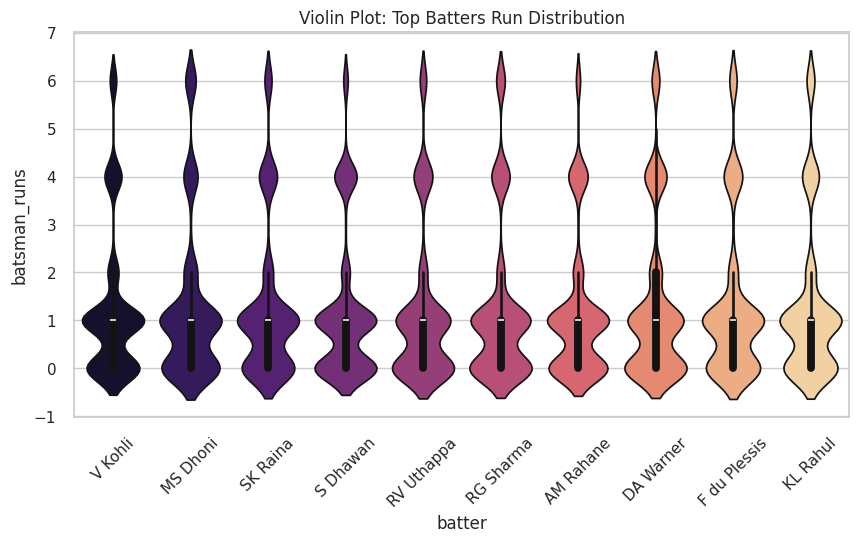

In [33]:
# (b) Violin Plot – Batsman Runs Distribution
# Note: Assuming 'batsman' column exists based on previous code.
# If the column name is 'batter', please update 'batsman' to 'batter' below.
if 'batter' in deliveries.columns:
  top_batters = deliveries['batter'].value_counts().head(10).index
  plt.figure(figsize=(10,5))
  sns.violinplot(data=deliveries[deliveries['batter'].isin(top_batters)],
                 x='batter', y='batsman_runs', palette='magma')
  plt.title('Violin Plot: Top Batters Run Distribution')
  plt.xticks(rotation=45)
  plt.show()
else:
  print("Column 'batter' not found in deliveries DataFrame. Skipping Violin Plot.")

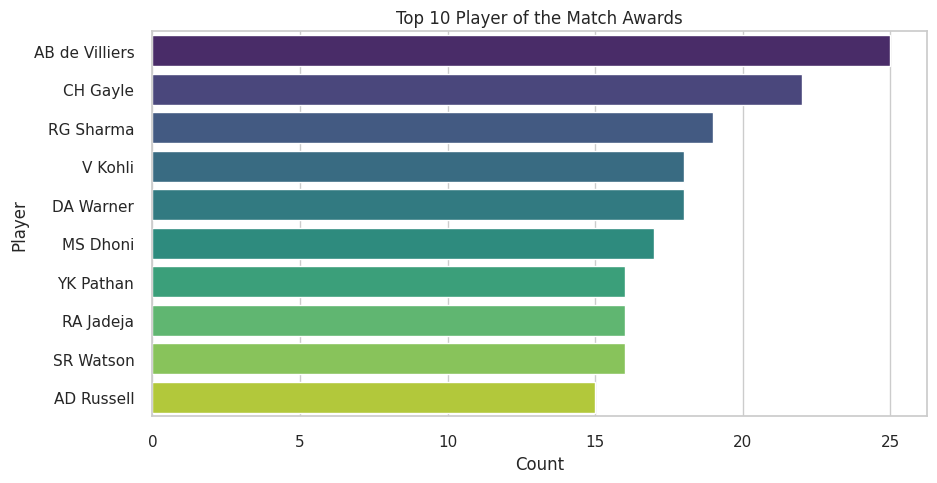

In [29]:
# (c) Count Plot – Top 10 Player of the Match Awards
top_players = matches['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.countplot(y='player_of_match',
              order=top_players.index,
              data=matches[matches['player_of_match'].isin(top_players.index)],
              palette='viridis')
plt.title('Top 10 Player of the Match Awards')
plt.xlabel('Count')
plt.ylabel('Player')
plt.show()

## Plotly Interactive Visualizations

In [34]:
# (a) Interactive Scatter Plot – Batsman vs Strike Rate
# Note: Assuming 'batsman' column exists based on previous code.
# If the column name is 'batter', please update 'batsman' to 'batter' below.
if 'batter' in deliveries.columns:
  batter_stats = deliveries.groupby('batter').agg({
      'batsman_runs':'sum',
      'ball': 'count'
  }).reset_index()
  batter_stats['strike_rate'] = (batter_stats['batsman_runs'] / batter_stats['ball']) * 100
  batter_stats = batter_stats[batter_stats['ball'] > 200]  # Filter regular players

  fig = px.scatter(batter_stats,
                   x='ball', y='strike_rate',
                   size='batsman_runs', color='batsman_runs',
                   hover_name='batter',
                   title='Interactive Scatter Plot – Batter Strike Rate vs Balls Faced')
  fig.show()
else:
    print("Column 'batter' not found in deliveries DataFrame. Skipping Interactive Scatter Plot.")

In [31]:
# (b) Interactive Histogram – Total Runs per Match
match_runs = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
fig = px.histogram(match_runs, x='total_runs', nbins=20,
                   title='Interactive Histogram – Total Runs per Match',
                   color_discrete_sequence=['orange'])
fig.update_xaxes(title='Total Runs')
fig.update_yaxes(title='Number of Matches')
fig.show()

## Conclusion

In [32]:
print("✅ Visualization Completed Successfully!")

✅ Visualization Completed Successfully!
